<a href="https://colab.research.google.com/github/jaisaman27/jaisaman27/blob/main/credit_card_fraud_detection_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection  import train_test_split

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as  sns

In [8]:
data_df=pd.read_csv("/creditcard.csv")

My dataset contains 285,000 rows and 31 columns

The most important columns are:

-Time(when the transaction happen)

-Amount(the amount transacted)

-Class (which define fraud or notfraud)

 where ,
 fraud value is 1 in dataset, 
 and not fraud value is 0 in dataset


In [9]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data_df.shape

(284807, 31)

In [11]:
data_df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [12]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [14]:
null_columns=pd.DataFrame({'Columns':data_df.isna().sum().index,'No. Null Values':data_df.isna().sum().values,'Percentage':data_df.isna().sum().values/data_df.shape[0]})

In [15]:
null_columns

,Columns,No. Null Values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [16]:
data_df['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

**Percentage of total not fraud transaction**

In [17]:
nfcount=0
notfraud=data_df['Class']
for i in range(len(notfraud)):
  if notfraud[i]==0:
    nfcount+=1
nfcount
per_nf=(nfcount/len(notfraud))*100
print("percentage of total not fraud transaction in the dataset:",per_nf)


percentage of total not fraud transaction in the dataset: 99.82725143693798


**percentage of total fraud transaction**

In [18]:
fcount=0
fraud=data_df['Class']
for i in range(len(fraud)):
  if fraud[i]==1:
    fcount+=1
fcount
per_f=(fcount/len(fraud))*100
print("percentage of total fraud transaction in the dataset:",per_f)

percentage of total fraud transaction in the dataset: 0.1727485630620034


In [19]:
plot_data=pd.DataFrame()
plot_data['Fraud transaction']=fraud
plot_data['notFraud transaction']=notfraud
plot_data

,Fraud transaction,notFraud transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


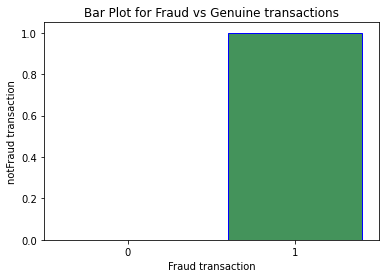

In [20]:
plt.title("Bar Plot for Fraud vs Genuine transactions")
sns.barplot(x='Fraud transaction',y='notFraud transaction',data=plot_data,palette='Greens',edgecolor='b')

As per the graph we can say the ratio of genuine Transaction are higher than the fraud transaction

Text(0.5, 1.0, 'Time Vs Amount')

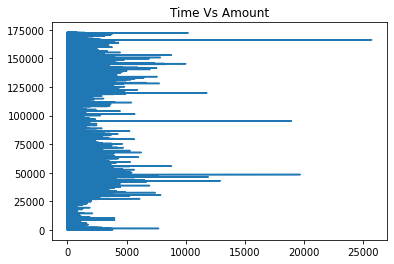

In [21]:
x=data_df['Amount']
y=data_df['Time']
plt.plot(x,y)
plt.title('Time Vs Amount')


In this Graph we plot the relation between Time and Amount Spend.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


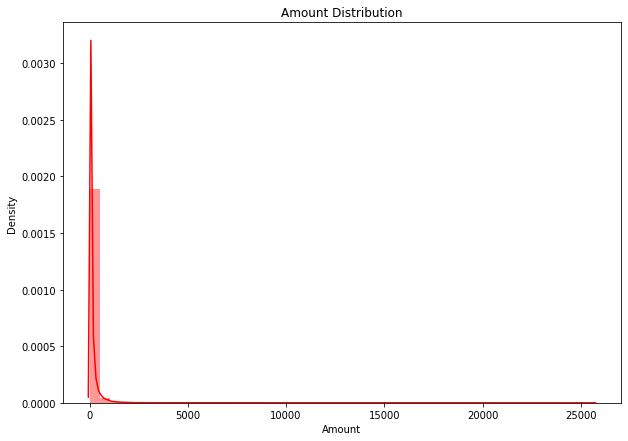

In [32]:
plt.figure(figsize=(10,7),)
plt.title('Amount Distribution')
sns.distplot(data_df['Amount'],color='red')

From this amount distribution curve it shown that the number of high transactions are very low. So there is high probability for huge transaction to be fraudlent.

**Now We see the Outliers of Amount and Time**

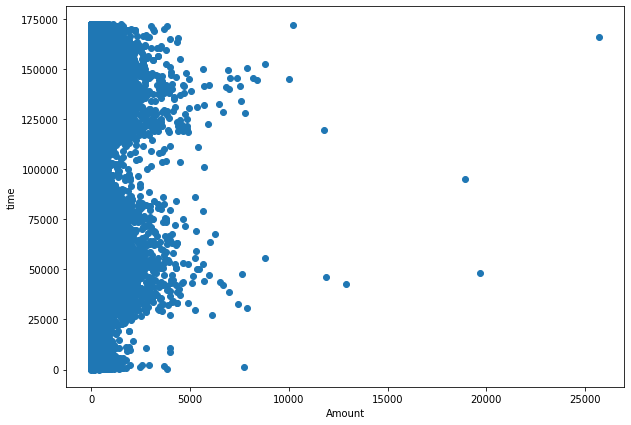

In [34]:
fig,ax=plt.subplots(figsize=(10,7))
ax.scatter(data_df['Amount'],data_df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('time')
plt.show()

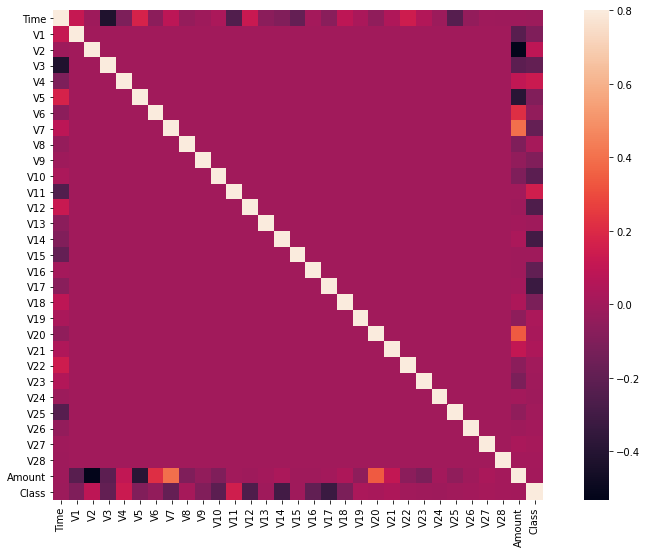

In [24]:
#Correlation Matrix
#Here Correlation Matrix defines/help us to understand the core relation between the attributes.
correlation_metrics=data_df.corr()  # i use the corr function to evaluate correlation matrix
fig=plt.figure(figsize=(15,9))
sns.heatmap(correlation_metrics,vmax=.8,square=True)
plt.show()

***Now We can start our Modelling the machine.***

For Modelling first we need to break the data into two parts:

Training Data And Testing Data.

My Training Data will 80% of the overall data.

and Testing data will be 20% of the overall data.

In [35]:
# we use two varibales here which will be x and y specifically everyone's choice is x and y . haha lol.
#Now, for X we will have the attributes except the class attribute as class is the target attribute which leads y to be the target variable.
x=data_df.drop(['Class'],axis=1)
y=data_df['Class']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40) 
# here we partioning the data in two parts as we discuss above using the train_test_split function.

***I am Using the Logistic Regression of Supervised Learning to train my Model.***

In [26]:
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)  # fit funtion of Logistic Regression is used to the both training data and train it.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

***Now Prediction will be done by the Model and We will find the accuracy given by our model on this dataset.***

In [38]:
y_pred=logreg.predict(xtest)  # model will predict using xtest variable (testing data of amount and time)
accuracy=logreg.score(xtest,ytest) #model will give the accuracy score of this trained model using testing set.
print(y_pred)
print(accuracy)

[0 0 0 ... 0 0 0]
0.9989817773252344


**Confusion Matrix**

-Positive(P) : Observation is positive. i.e, transaction is genuine.

-Negative(N) : Observation is negative. i.e, transaction is fraud.

-True Positive(TP) : Observation is positive and is predicted to be positive.

-False Negative(FN) : Observation is positive and is predicted to be negative.

-True Negative(TN) : Observation is negative and is predicted to be negative.

-False Positive(FP) : Observation is negative and is predicted to be positive.


Confusion Matrix will look like as

  ([TP | FN]

  [FP | TN])

**Accuracy = TP+TN/(TP+TN+FP+FN)**





In [40]:
cm=metrics.confusion_matrix(ytest, y_pred)   # here cm is the confusion matrix
print(cm)

[[56837    28]
 [   30    67]]


**Accuracy Calculation**

In [41]:
print('Accuracy score of my model is:',accuracy*100,'%')

Accuracy score of my model is: 99.89817773252344 %
